Dataset preprocessing


All necessary modules are imported and the "tic-tac-toe.data" is read using pd.read_csv

In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv
np.random.seed(3116)

col_names=['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square',
    'bottom-left-square','bottom-middle-square','bottom-right-square','Class']

tic_df= pd.read_csv("tic-tac-toe.data",sep=",",names=col_names)
tic_df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


**1. Convert any non-numeric values to numeric values. For example you can replace a country name
with an integer value or more appropriately use hot-one encoding. [Hint: use hashmap (dict) or
pandas.get_dummies]. Please explain your solution.**

**Approach:**<br>
1)Here i used pd.get_dummies for converting non numeric to numeric:<br>
2)This created 2 columns at last. i.e "Class_negative" and "Class_positive". The "Class_negative" can be droppedand "Class_positive" can be used as target column


In [97]:
tic_df=pd.get_dummies(tic_df)
tic_df.head()

,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x,Class_negative,Class_positive
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [98]:
# dropping "Class_negative"
tic_df.drop(columns = 'Class_negative',inplace=True)
tic_df.shape

(958, 28)

#### Ex0_2. This dataset is unbalanced, (show how we can confirm this). Explain what is stratified samplin and Implement a stratified sampler.

#### Ex0_3 Split the data into a train(80%) and test(20%).

**Unbalanced**<br>
1) I counted the each class using .value_counts()<br>
2) The positive class count is double almost double to that of negative class.Therefore the dataset is unbalanced<br>

**Stratified sampling and splitting**<br>
1) In straified sampling, the data is split such that, ration of class1 to class 2 is same in all splits to that of in the main data frame.<br>
2) For this I grouped the the data frame based on 'Class_positive' column. Then from each class, I took 80% of the instances using ".sample(0.8*total numbe of samples)". This resulted in "train" data frame and it is shuffled.<br>
3) Then test data is obtained by dropping the indexes of train data in main data frame. This results in test data that contains 20% of the data maintining the stratified sampling condition.<br>
4) class"0" to class "1" ratios of main_df,train_df,test_df are 0.530, 0.5309 -- 0.528 which are almost same satisfying the stratified sampling property.<Br>
5) This is helpful in unbalanced datasets

Ref_for_stratified_sampling:
https://www.statology.org/stratified-sampling-pandas/

In [99]:
# Unbalanced dataset
print(tic_df['Class_positive'].value_counts())
print("Positive class is almost double to the negative. Hence the data set is unbalancced")

1    626
0    332
Name: Class_positive, dtype: int64
Positive class is almost double to the negative. Hence the data set is unbalancced


In [100]:
# Stratified ssampling
# Grouped by class
tic_grouped=tic_df.groupby('Class_positive', group_keys=False)
train=tic_grouped.apply(lambda x: x.sample(int(round(0.8*len(x),0)))) #splitting 80 percent data group wise
train=train.sample(frac=1)
test=tic_df.drop(train.index)   # geting 20% data by dropping train data in main df

In [102]:
tic_count=tic_df['Class_positive'].value_counts()
train_count=train['Class_positive'].value_counts()
test_count=test['Class_positive'].value_counts()
print("negative_class to positive class ratios of main_df,train_df,test_df")
print(332/626, "--",train_count[0]/train_count[1],"--",test_count[0]/test_count[1])

negative_class to positive class ratios of main_df,train_df,test_df
0.5303514376996805 -- 0.530938123752495 -- 0.528


#### Splitting train and test data into features and targets:
1)Defined a function "train_test_split" for preparing xdata and ydata<br>
2)From train and test, xdata is prepared by dropping the target coloumn i.e 'Class'<br>
3)Y data is prepared by selecting target 'Class_positive'.<br>
4)Converted to numpy and bias of ones is added infront of xdata<br>
4)The shapes are printed out

In [103]:
# function for splitting xdata and ydata
def train_test_split(train,test):
    x_train = train.iloc[:,:-1]
    y_train = train.iloc[:,-1]

    x_test = test.iloc[:,:-1]
    y_test = test.iloc[:,-1]


    x_train =x_train.to_numpy()
    x_test=x_test.to_numpy()
    y_train=y_train.to_numpy()
    y_test=y_test.to_numpy()
    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    
  #converting df into arrays 
    ones_train= np.ones((x_train.shape[0],1))
    ones_test= np.ones((x_test.shape[0],1)) 
    
  #adding bias to xdata
    x_train =np.concatenate((ones_train,x_train),axis=1)
    x_test=np.concatenate((ones_test,x_test),axis=1)
    
    return x_train,x_test,y_train,y_test


x_train,x_test,y_train,y_test=train_test_split(train,test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(767, 28) (191, 28) (767, 1) (191, 1)


## Logistic Regression with Gradient Ascent

$\hat{y}^{n}=\sigma\left(\beta^{T} \mathbf{x}^{n}\right)$ where sigma= $\frac{1}{1+c^{-\beta^{2}} \times^{n}}$


$\log L_{\mathcal{D}}^{\text {cond }}(\hat{\beta})=\sum_{n=1}^{N} y_{n} \log \hat{y}_{n}+\left(1-y_{n}\right) \log \left(1-\hat{y}_{n}\right)$

**Approach**<BR>
I created functions for y_hat, gradient and loglikelihhod as per the given formulas. To get the log loss on test data,negated the loglikelihood.<br>


In [259]:
def grad(x,y,betas):
    return x.T@(y-y_hat(x,betas))
def y_hat(x,betas):
    return 1 / (1 + np.exp(-(x@betas)))
def loglikelihood(y,yhat):
    return np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat))
##logloss is  the negative of log likelihood
def log_loss(y,yhat):
    return -loglikelihood(y,yhat)

### bolddriver function

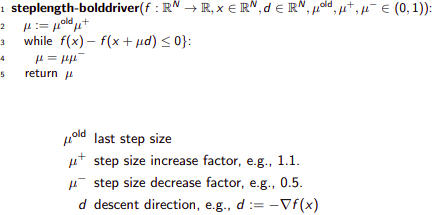

1) The bolddriver function is defined as per the above alogorithm. <br>
2)But only difference is here we are using gradient ascent. Therefore $d:=\nabla f(x)$ is used.<br>
3)we will try to maximize the loglikelihhood. we will reduce steplength mu unitll we get new loglikelihood greater than the old one. i.e f2>f1<Br>

In [260]:
def bolddriver(x,y,betas,mu):
    mu_plus,mu_minus = 1.1,0.5
    mu = mu*mu_plus
    
    y_hat_1 = y_hat(x,betas)
    f1=loglikelihood(y,y_hat_1)
    
    betas_2= betas + mu*grad(x,y,betas)  
    y_hat_2 = y_hat(x,betas_2)
    f2=loglikelihood(y,y_hat_2)
    
    while f1-f2 >= 0: 
        mu = mu_minus*mu
        betas_2 = betas + mu*grad(x,y,betas)  
        y_hat_2 = y_hat(x,betas_2)
        f2=loglikelihood(y,y_hat_2)
    return mu

### learn-logreg-GA
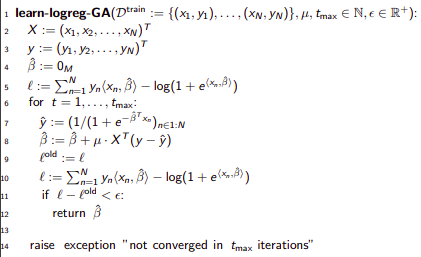

#### Ex1 :Optimize the loglikelihood function log(L cond) using Gradient Ascent algorithm. Implement (learn-logreg-GA). Choose i max between 100 to 1000.

**You will use bolddriver as the step length controller.
– In each iteration of the algorithm calculate |f (x i−1 ) − f (x i )| and at the end of learning, plot it
against iteration number i. Explain the graph.**<br>
**– In each iteration step also calculate logloss on test set (see ref:https://www.kaggle.
com/wiki/LogarithmicLoss), plot it against iteration number i. Explain the graph.**

1) defined a function "learn_logreg_GA" as per the above algorithm.<br>
2) This function takes all splitted train and test data of x & y,iterations,steplength and epsilon as arguments<br>
3) In each iteration, steplength is controlled by bolddriver fucntion
4)betas are updated as per the given formula in algorithm.<br>
5) y_hat and corresponding loglikelihood is predicted before and after updation of betas.<Br>
6) Here loglikelihood is maximized in gradient ascent. <br>
7) It will iterate untill there is no notable difference between new loglikelihhod and the old loglikelihood.<br>
8) It will break the loop and return abs_loglikehood_dif,test_log_loss, once the condition satisifies<br>
9) While iterating, absolute loglikelihood difference is appended to the corresponding list.<br>
10) Logloss on test data is calculated using the  "log_loss" function created above which is the negative loglikelihood on test data.<br>

In [261]:
def learn_logreg_GA(x_train,y_train,x_test,y_test,imax,mu,epsilon):
    betas = np.zeros((x_train.shape[1],1))
    abs_loglikehood_dif = []
    test_log_loss = []
    for i in range(imax):
        yhat = y_hat(x_train,betas)
        f1 = loglikelihood(y_train,yhat)
        mu = bolddriver(x_train,y_train,betas,mu)
        betas = betas + mu*grad(x_train,y_train,betas) 
        yhat = y_hat(x_train,betas)
        f2 = loglikelihood(y_train,yhat)
        abs_loglikehood_dif.append(abs(f1-f2))  
        yhat_test = y_hat(x_test,betas)   
        test_log_loss.append(log_loss(y_test,yhat_test)) 
        if f2-f1 < epsilon:
            break    
    return abs_loglikehood_dif,test_log_loss

abs_loglikehood_dif,test_log_loss = learn_logreg_GA(x_train,y_train,x_test,y_test,1000,1e-3,1e-6)

mini test_logloss with GA method : 8.279075660902002


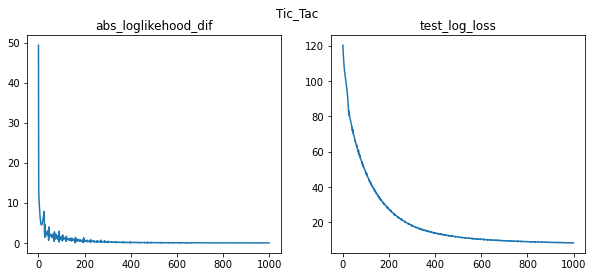

In [262]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
fig.suptitle('Tic_Tac')
ax1.plot(abs_loglikehood_dif)
ax2.plot(test_log_loss)
ax1.set_title('abs_loglikehood_dif')
ax2.set_title("test_log_loss")
print('mini test_logloss with GA method :', min(test_log_loss))

**Comment**: In some iterations, the loss difference is getting high than that of previous iterations which may be due to local ectremities or step length influence. After about 400 iterations, it is becoming smooth.For the test logloss, it is taking more iterations i.e almost 1000 iterations to converge. I tried with different steplengths, step_length 1e-3 gave less test loss and better graphs.